In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "drive/MyDrive/Colab Notebooks/" 

!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q celeba-dataset.zip -d .

 99% 1.32G/1.33G [00:08<00:00, 232MB/s]
100% 1.33G/1.33G [00:08<00:00, 160MB/s]


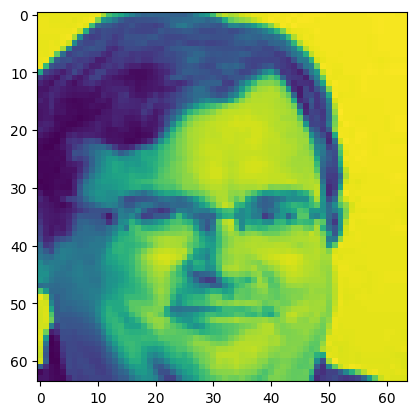

(50000, 64, 64)


In [4]:
from PIL import Image
import os 
import numpy as np 

file_list = os.listdir('/content/img_align_celeba/img_align_celeba')

images = []

for i in file_list[0:50000]:
  numberized = Image.open('/content/img_align_celeba/img_align_celeba/' + i).crop( (20,30,160,180) ).convert('L').resize( (64,64) )
  images.append( np.array(numberized) )

import matplotlib.pyplot as plt
plt.imshow(images[1])
plt.show()

images = np.array(images)
print(images.shape)



In [5]:
images = np.divide(images, 255)

images = images.reshape( 50000, 64, 64, 1 )

print(images.shape)

(50000, 64, 64, 1)


In [6]:
#Discriminator

import tensorflow as tf 

#determine if image is real or fake
discriminator = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=[64,64,1]),
  tf.keras.layers.LeakyReLU(alpha=0.2), #multiply alpha = small number to negative values
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid') 
])

#Generator 
noise_shape = 100

#input 100 random number and output one image
generator = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4 * 4 * 256, input_shape=(100,) ), 
  tf.keras.layers.Reshape((4, 4, 256)),
  tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding='same', activation='sigmoid')
])

generator.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4096)              413696    
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 256)        590080    
 nspose)                                                         
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 256)         0         
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 256)        1024      
 ormalization)                                                   
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)     

In [15]:
GAN = tf.keras.models.Sequential([ generator, discriminator ])

discriminator.compile( optimizer='adam', loss='binary_crossentropy' )

discriminator.trainable = False
GAN.compile( optimizer='adam', loss='binary_crossentropy' ) 

In [16]:
def predict_pic():

  random_num = np.random.uniform( -1, 1, size=(10, 100) )

  prediction = generator.predict(random_num)

  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(prediction[i].reshape(64,64), cmap='gray')
    plt.axis('off')
  plt.tight_layout()
  plt.show()


current epoch is 0th epoch
1/1 [==============================] - 0s 19ms/step


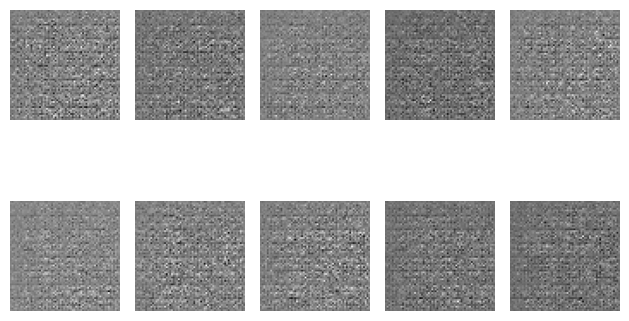

current batch is 0th batch
4/4 [==============================] - 0s 4ms/step
current batch is 100th batch
4/4 [==============================] - 0s 6ms/step
current batch is 200th batch
4/4 [==============================] - 0s 3ms/step
current batch is 300th batch
4/4 [==============================] - 0s 6ms/step
This epoch total loss is Discriminator: 1.190186619758606 GAN: 3.056525230407715
current epoch is 1th epoch
1/1 [==============================] - 0s 34ms/step


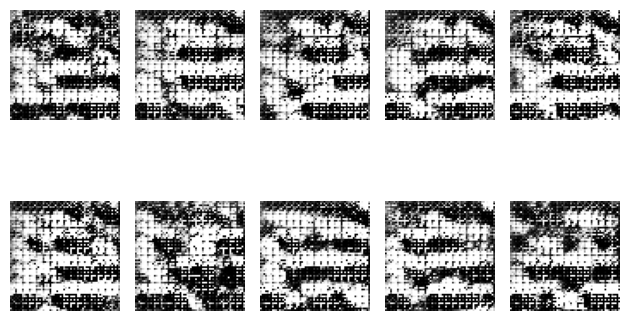

current batch is 0th batch
4/4 [==============================] - 0s 4ms/step
current batch is 100th batch
4/4 [==============================] - 0s 4ms/step
current batch is 200th batch
4/4 [==============================] - 0s 4ms/step
current batch is 300th batch
4/4 [==============================] - 0s 5ms/step
This epoch total loss is Discriminator: 1.2782077193260193 GAN: 1.0019233226776123
current epoch is 2th epoch
1/1 [==============================] - 0s 17ms/step


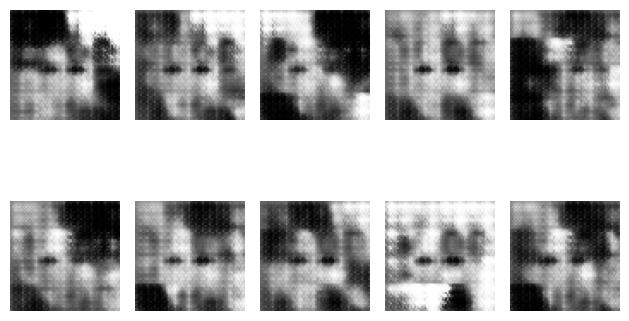

current batch is 0th batch
4/4 [==============================] - 0s 5ms/step
current batch is 100th batch
4/4 [==============================] - 0s 8ms/step
current batch is 200th batch
4/4 [==============================] - 0s 4ms/step
current batch is 300th batch
4/4 [==============================] - 0s 5ms/step
This epoch total loss is Discriminator: 1.1135626435279846 GAN: 0.598202109336853
current epoch is 3th epoch
1/1 [==============================] - 0s 19ms/step


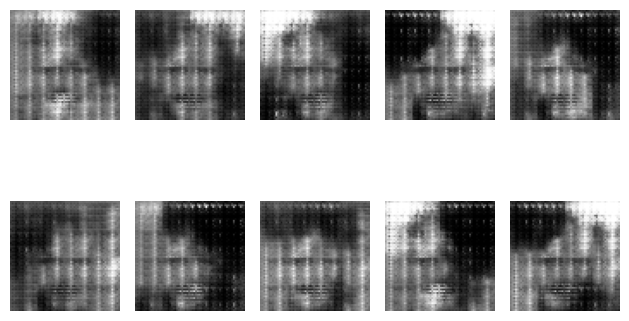

current batch is 0th batch
4/4 [==============================] - 0s 4ms/step
current batch is 100th batch
4/4 [==============================] - 0s 5ms/step
current batch is 200th batch
4/4 [==============================] - 0s 5ms/step
current batch is 300th batch
4/4 [==============================] - 0s 3ms/step
This epoch total loss is Discriminator: 0.9719215631484985 GAN: 1.1766849756240845
current epoch is 4th epoch
1/1 [==============================] - 0s 18ms/step


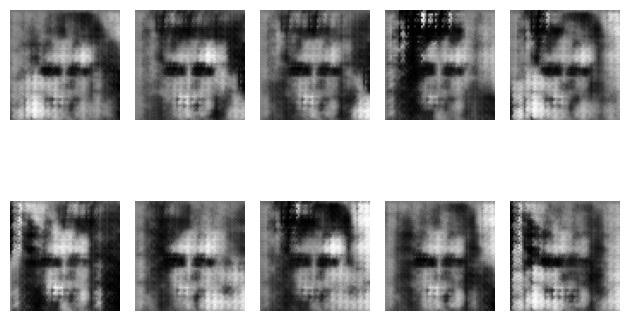

current batch is 0th batch
4/4 [==============================] - 0s 4ms/step
current batch is 100th batch
4/4 [==============================] - 0s 6ms/step
current batch is 200th batch
4/4 [==============================] - 0s 5ms/step
current batch is 300th batch
4/4 [==============================] - 0s 5ms/step
This epoch total loss is Discriminator: 1.5174691677093506 GAN: 0.817186713218689
current epoch is 5th epoch
1/1 [==============================] - 0s 19ms/step


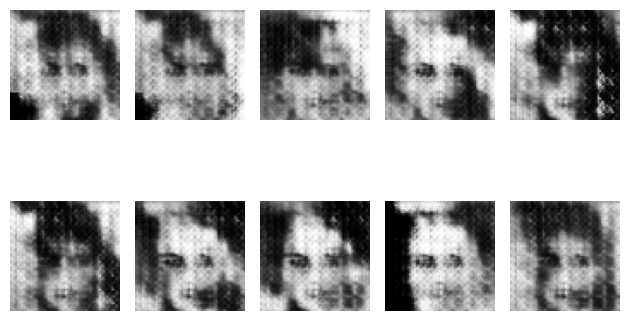

current batch is 0th batch
4/4 [==============================] - 0s 5ms/step
current batch is 100th batch
4/4 [==============================] - 0s 4ms/step
current batch is 200th batch
4/4 [==============================] - 0s 5ms/step
current batch is 300th batch
4/4 [==============================] - 0s 3ms/step
This epoch total loss is Discriminator: 1.418034851551056 GAN: 1.162798285484314
current epoch is 6th epoch
1/1 [==============================] - 0s 17ms/step


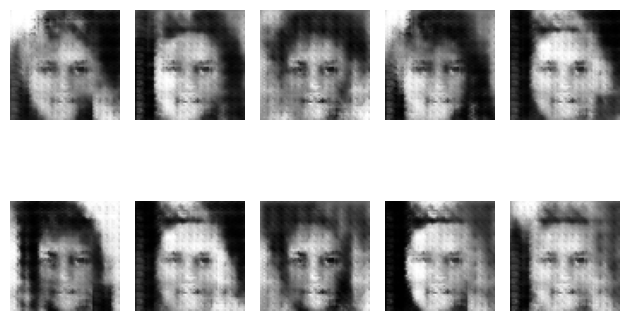

current batch is 0th batch
4/4 [==============================] - 0s 5ms/step
current batch is 100th batch
4/4 [==============================] - 0s 4ms/step
current batch is 200th batch
4/4 [==============================] - 0s 7ms/step
current batch is 300th batch
4/4 [==============================] - 0s 3ms/step
This epoch total loss is Discriminator: 1.3340222239494324 GAN: 1.320913314819336
current epoch is 7th epoch
1/1 [==============================] - 0s 18ms/step


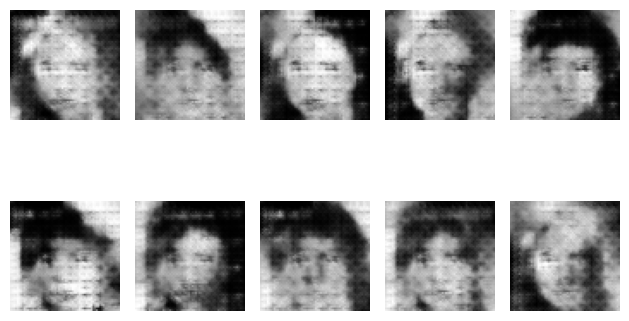

current batch is 0th batch
4/4 [==============================] - 0s 5ms/step
current batch is 100th batch
4/4 [==============================] - 0s 3ms/step
current batch is 200th batch
4/4 [==============================] - 0s 9ms/step
current batch is 300th batch
4/4 [==============================] - 0s 3ms/step
This epoch total loss is Discriminator: 0.9805024564266205 GAN: 1.3388745784759521
current epoch is 8th epoch
1/1 [==============================] - 0s 24ms/step


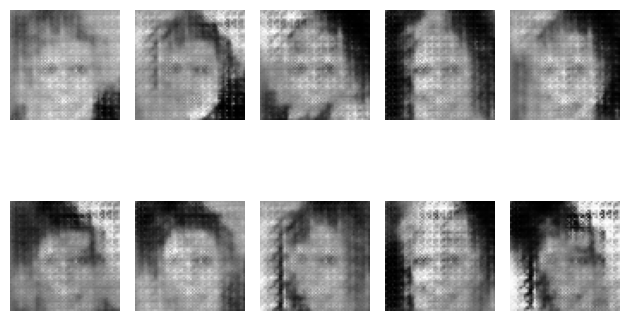

current batch is 0th batch
4/4 [==============================] - 0s 5ms/step
current batch is 100th batch
4/4 [==============================] - 0s 6ms/step
current batch is 200th batch
4/4 [==============================] - 0s 4ms/step
current batch is 300th batch
4/4 [==============================] - 0s 6ms/step
This epoch total loss is Discriminator: 0.9367229342460632 GAN: 1.3897373676300049
current epoch is 9th epoch
1/1 [==============================] - 0s 18ms/step


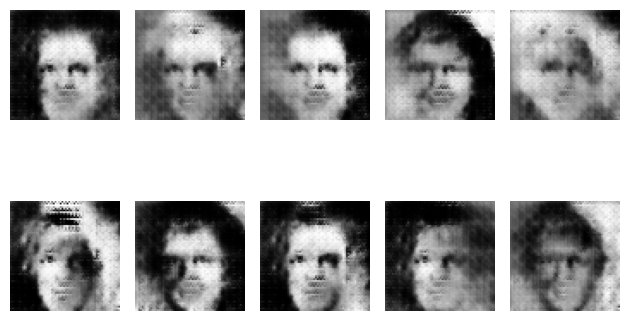

current batch is 0th batch
4/4 [==============================] - 0s 3ms/step
current batch is 100th batch
4/4 [==============================] - 0s 3ms/step
current batch is 200th batch
4/4 [==============================] - 0s 5ms/step
current batch is 300th batch
4/4 [==============================] - 0s 5ms/step


In [ ]:
X_data = images

for j in range(300): 

  print(f'current epoch is {j}th epoch')

  predict_pic( )

  for i in range(50000//128):
    
    if i % 100 == 0:
      print(f'current batch is {i}th batch')

    #discriminator training
    real_images = X_data[ i*128 : (i+1)*128 ]
    marked_1 = np.ones( shape=(128,1) )
    loss1 = discriminator.train_on_batch( real_images, marked_1)

    random_num = np.random.uniform(-1, 1, size=(128, 100) )
    fake_images = generator.predict(random_num)
    marked_0 = np.zeros( shape=(128,1) )
    loss0 = discriminator.train_on_batch( fake_images, marked_0)

    #generator training
    random_num = np.random.uniform(-1, 1, size=(128, 100) )
    marked_1 = np.ones( shape=(128,1) )

    loss_G = GAN.train_on_batch(random_num, marked_1)

  print(f'This epoch total loss is Discriminator: {loss1+loss0} GAN: {loss_G}')
